<a href="https://colab.research.google.com/github/felipe-gm/-ifusp_fiscomp_2/blob/master/2020_03_11/Questao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import sin, cos, exp, log2
from numpy import arange
import matplotlib.pyplot as plt

O objetivo deste exercício é quantificar a dependência do erro associado ao método de Runge-Kutta de quarta ordem com os parâmetros da equação diferencial, fixado o tamanho do passo de integração.

# Equacao diferencial

In [0]:
def f(x,t,omega,gamma=1.):
  '''Equacao diferencial
    dx/dt=−2exp(−γt)[γcos(ωt)+ωsen(ωt)]
  '''
  return -2*exp(-gamma*t)*(gamma*cos(omega*t)+omega*sin(omega*t))

# Solucao exata da equacao diferencial

In [0]:
def x_exato(t,omega,gamma=1.,x0=0): return x0-2+2*exp(-gamma*t)*cos(omega*t)

# Integracao numerica e calculo de erros

In [0]:
def main(omega,N=100):
  """Integra numericamente a equação diferencial
    dx/dt=−2exp(−γt)(γcost+sent),
  no intervalo entre t=0 e t=10, utilizando tanto o método de Euler quanto
  o metodo de Runge-Kutta de segunda ordem. Utilizando como condicao 
  inicial x(0)=0. Calcula o erro medio associado ao calculo.
  """
  a = .0
  b = 10.
  h = (b-a)/N
  x = .0

  t_euler = arange(a,b,h)
  x_euler = []
  for t in t_euler:
    x_euler.append(x)
    x += h*f(x,t,omega)

  t_rk4 = arange(a,b,h)
  x_rk4 = []
  x = .0
  for t in t_rk4:
    x_rk4.append(x)
    k1 = h*f(x,t,omega)
    k2 = h*f(x+.5*k1,t+.5*h,omega)
    k3 = h*f(x+.5*k2,t+.5*h,omega)
    k4 = h*f(x+k3,t+h,omega)
    x += (k1+2*k2+2*k3+k4)

  erro_rk4 = ((1/N)*sum([(x_rk4[n]-x_exato(n*h,omega))**2 for n in range(N)]))**(1/2)

  return erro_rk4

## Listas de erros

In [0]:
omega_set = [1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0]
ls_erro_rk4 = []
for omega in omega_set:
  erro_rk4 = main(omega)
  ls_erro_rk4.append(erro_rk4)

## Plot log-log

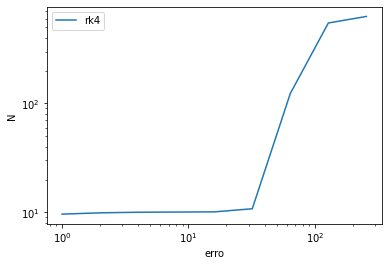

In [6]:
log_N = [log2(N) for N in omega_set]
plt.plot(omega_set, ls_erro_rk4, label='rk4')
plt.xlabel("erro")
plt.ylabel("N")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Voce deve perceber uma mudanca qualitativa no grafico entre as regioes omega<32.0 e omega>32.0. 

# A que voce atribui essa mudanca?   

Atribuo essa mudança à comparação entre frequência do termo cosseno e o tamanho do passo de integração (resolução do método).

Estendendo o conjunto de testes de omegas para valores ainda maiores que os propostos, é plausível inferir que temos um fenômeno de transição de fase. Da região em que a resolução da integração captura bem as oscilações do termo cosseno, para a região em que o período do cosseno se torna irrelevante em comparação ao passo (aprox.: omega>128).